In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

In [2]:
import pandas as pd

# Reading the CSV file from the provided link
url = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Reading the CSV file into a DataFrame
df = pd.read_csv(url)

# Displaying the first few rows of the dataframe
print(df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


# Variable Definitions

- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **MEDV**: Median value of owner-occupied homes (in $1000's)
- **DIS**: Weighted distance to five Boston employment centers
- **PTRATIO**: Pupil-teacher ratio by town
- **AGE**: Proportion of owner-occupied units built prior to 1940


Text(0.5, 1.0, 'median value of owner occupier homes')

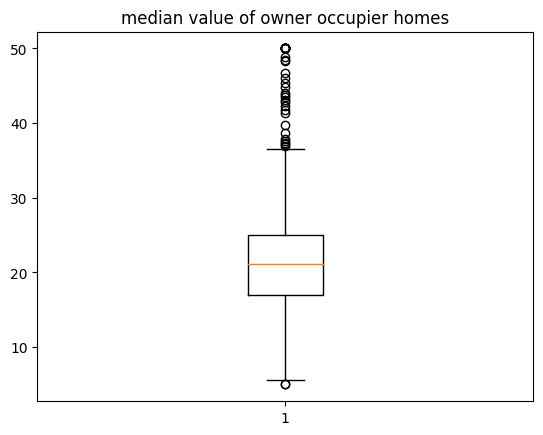

In [3]:
# median value of owner occupier homes - provide a boxplot
plt.boxplot(df.MEDV)
plt.title('median value of owner occupier homes')
# median value of owner occupier homes - provide a boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x150ec450c40>,
 'caps': [<matplotlib.lines.Line2D at 0x150ec4511e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x150ec450970>],
 'medians': [<matplotlib.lines.Line2D at 0x150ec451780>],
 'fliers': [<matplotlib.lines.Line2D at 0x150ec451a50>],
 'means': []}

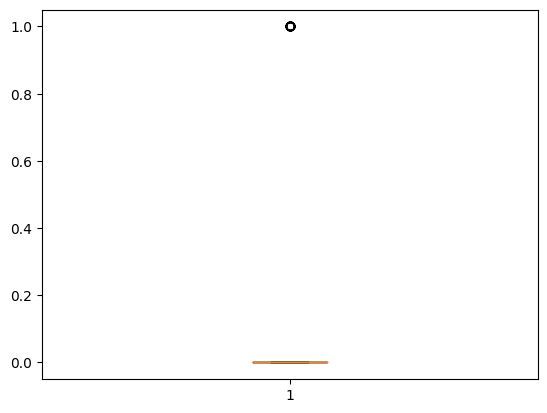

In [4]:
# provide a boxplot for the charles river var 
# TODO ????
plt.boxplot(df.CHAS)

Text(0.5, 0.98, '')

<Figure size 1000x800 with 0 Axes>

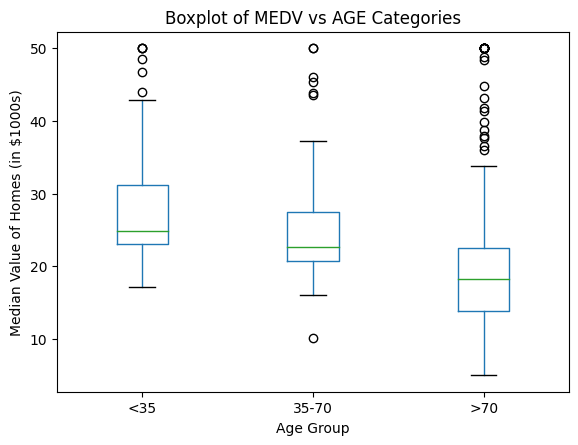

In [5]:
# Discretizing the AGE variable into categories
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<35', '35-70', '>70'])

# Creating the boxplot
plt.figure(figsize=(10, 8))
df.boxplot(column='MEDV', by='AGE_group', grid=False)
plt.title('Boxplot of MEDV vs AGE Categories')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes (in $1000s)')
plt.suptitle('')  # Suppress the automatic title to clean up the plot appearance

Text(0.5, 1.0, 'scatterplonitric oxide vs the non retail business')

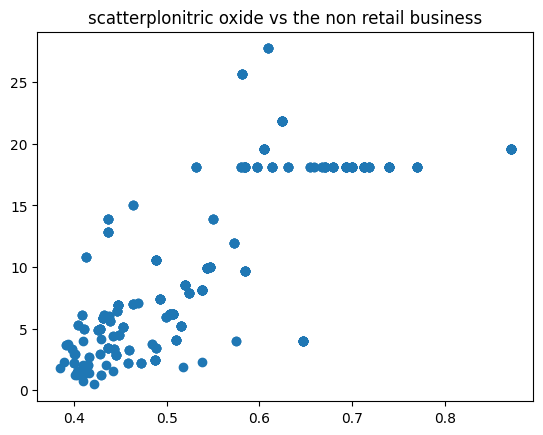

In [6]:
plt.scatter(x=df.NOX, y=df.INDUS)
plt.title('scatterplonitric oxide vs the non retail business')

Text(0.5, 1.0, 'historgram for the pupil to teacher ratio')

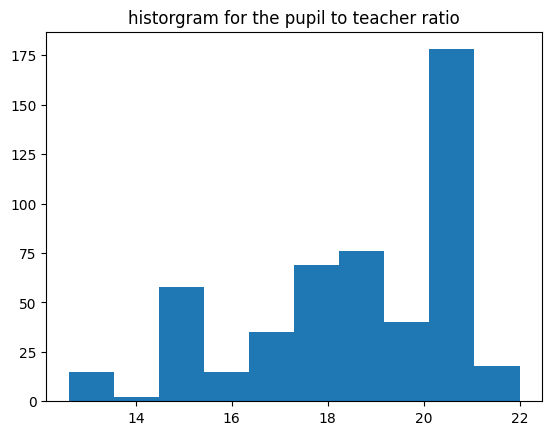

In [7]:
plt.hist(df.PTRATIO)
plt.title('historgram for the pupil to teacher ratio')

# Hypothesis Testing: Difference in Median Value of Houses Bounded by the Charles River

In this analysis, we aim to determine whether there is a significant difference between the **median value of houses** that are **bounded by the Charles River** and those that are not. We will use a t-test for independent samples to compare the two groups.

## Hypotheses

- **Null Hypothesis (H₀):** There is no significant difference between the median value of houses bounded by the Charles River and those that are not. (Mean difference = 0)
  
- **Alternative Hypothesis (H₁):** There is a significant difference between the median value of houses bounded by the Charles River and those that are not. (Mean difference ≠ 0)



In [8]:
import scipy.stats as stats

near_river = df[df['CHAS'] == 1]['MEDV']
not_near_river = df[df['CHAS'] == 0]['MEDV']

# Perform an independent T-test
t_stat, p_value = stats.ttest_ind(near_river, not_near_river, equal_var=False)

# Check median values
median_near_river = near_river.median()
median_not_near_river = not_near_river.median()

# Output results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Median value (near river): {median_near_river}")
print(f"Median value (not near river): {median_not_near_river}")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
Median value (near river): 23.3
Median value (not near river): 20.9


# Conclusion: Significant Difference Detected

With a p-value below 0.05, we reject the null hypothesis (H₀) and conclude that **there is a significant difference in the median value of houses based on whether they are bounded by the Charles River or not**. Location near the river affects home values.


# Hypothesis Testing: Difference in MEDV for Proportion of Owner-Occupied Units Built Prior to 1940

In this analysis, we aim to determine whether there is a significant difference in the **median value of owner-occupied homes (MEDV)** based on the **proportion of units built prior to 1940**. We will use an ANOVA (Analysis of Variance) test to compare the groups.

## Hypotheses

- **Null Hypothesis (H₀):** There is no significant difference in the median value of owner-occupied homes (MEDV) across different proportions of units built prior to 1940. (All group means are equal)
  
- **Alternative Hypothesis (H₁):** There is a significant difference in the median value of owner-occupied homes (MEDV) for at least one group based on the proportion of units built prior to 1940. (At least one group mean is different)



In [9]:
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])

grouped_medv = [df[df['AGE_group'] == grp]['MEDV'] for grp in ['Low', 'Medium', 'High']]

anova_stat, p_value_anova = stats.f_oneway(*grouped_medv)

mean_values = {grp: df[df['AGE_group'] == grp]['MEDV'].mean() for grp in ['Low', 'Medium', 'High']}

# Output results
print(f"F-statistic: {anova_stat}")
print(f"P-value: {p_value_anova}")
print(f"Mean values for each AGE group: {mean_values}")

F-statistic: 28.022628828406628
P-value: 2.893582414484241e-12
Mean values for each AGE group: {'Low': 27.3828125, 'Medium': 25.749586776859502, 'High': 20.353271028037383}


# Conclusion: Significant Difference Across Groups Detected

Since the p-value is extremely low, we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁).

This means that **there is a significant difference in the median value of owner-occupied homes (MEDV) across the three analyzed groups** based on the proportion of units built prior to 1940. Therefore, the age distribution of homes has a meaningful impact on their median values.


# Hypothesis Testing: Relationship Between Nitric Oxide and Proportion of Non-Retail Business Acres

In this analysis, we aim to determine whether there is a significant linear relationship between the levels of **nitric oxide** (NO) and the **proportion of non-retail business acres per town** using Pearson's correlation coefficient.

## Hypotheses

We will conduct a hypothesis test using the following null and alternative hypotheses:

- **Null Hypothesis (H₀):** There is no significant relationship between nitric oxide levels and the proportion of non-retail business acres per town. (Pearson's correlation coefficient = 0)
  
- **Alternative Hypothesis (H₁):** There is a significant relationship between nitric oxide levels and the proportion of non-retail business acres per town. (Pearson's correlation coefficient ≠ 0)


In [13]:
import scipy
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.7636514469209155, pvalue=7.913361061237816e-98)

# Conclusion: Significant Relationship Detected

Based on the results of our analysis, **there is a significant relationship between nitric oxide levels and the proportion of non-retail business acres per town**.

This finding suggests that changes in the levels of nitric oxide are correlated with the proportion of business acres in non-retail sectors across different towns. The nature of this relationship (positive or negative) would depend on the value of the Pearson correlation coefficient.


# Hypothesis Testing: Impact of Weighted Distance to Employment Centers on Median Home Value

In this analysis, we aim to assess whether the **weighted distance to the five Boston employment centers** has a significant impact on the **median value of owner-occupied homes**. We will use regression analysis to quantify this relationship.

## Hypotheses

- **Null Hypothesis (H₀):** The weighted distance to the five Boston employment centers has no significant impact on the median value of owner-occupied homes. (The regression coefficient = 0)
  
- **Alternative Hypothesis (H₁):** The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes. (The regression coefficient ≠ 0)


In [20]:
from scipy.stats import linregress
result = linregress(df['DIS'], df['MEDV'])
print(result.slope, result.pvalue)

1.0916130158411095 1.2066117273371223e-08


# Interpretation of Slope and P-Value

### Slope
- The slope (e.g., **1.0916**) indicates that for every additional unit of distance from the five Boston employment centers (**DIS**), the median home value (**MEDV**) increases by approximately **$1,091**. This suggests a **positive relationship**: homes farther from the city centers tend to be more expensive.

### P-Value
- A low p-value (e.g., **< 0.05**) suggests the relationship between distance and home value is **statistically significant**. This means the increase in home values with distance is unlikely due to chance.

### Conclusion
- The positive slope and significant p-value indicate that homes located farther from the employment centers generally have higher median values.
